# Projet Data Science : Apple Quality

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
data = pd.read_csv("apple_quality.csv")

### Data Pre-processing

In [3]:
data.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

In [4]:
dimension = data.shape
print(dimension)

(4001, 9)


C:\Users\konai\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


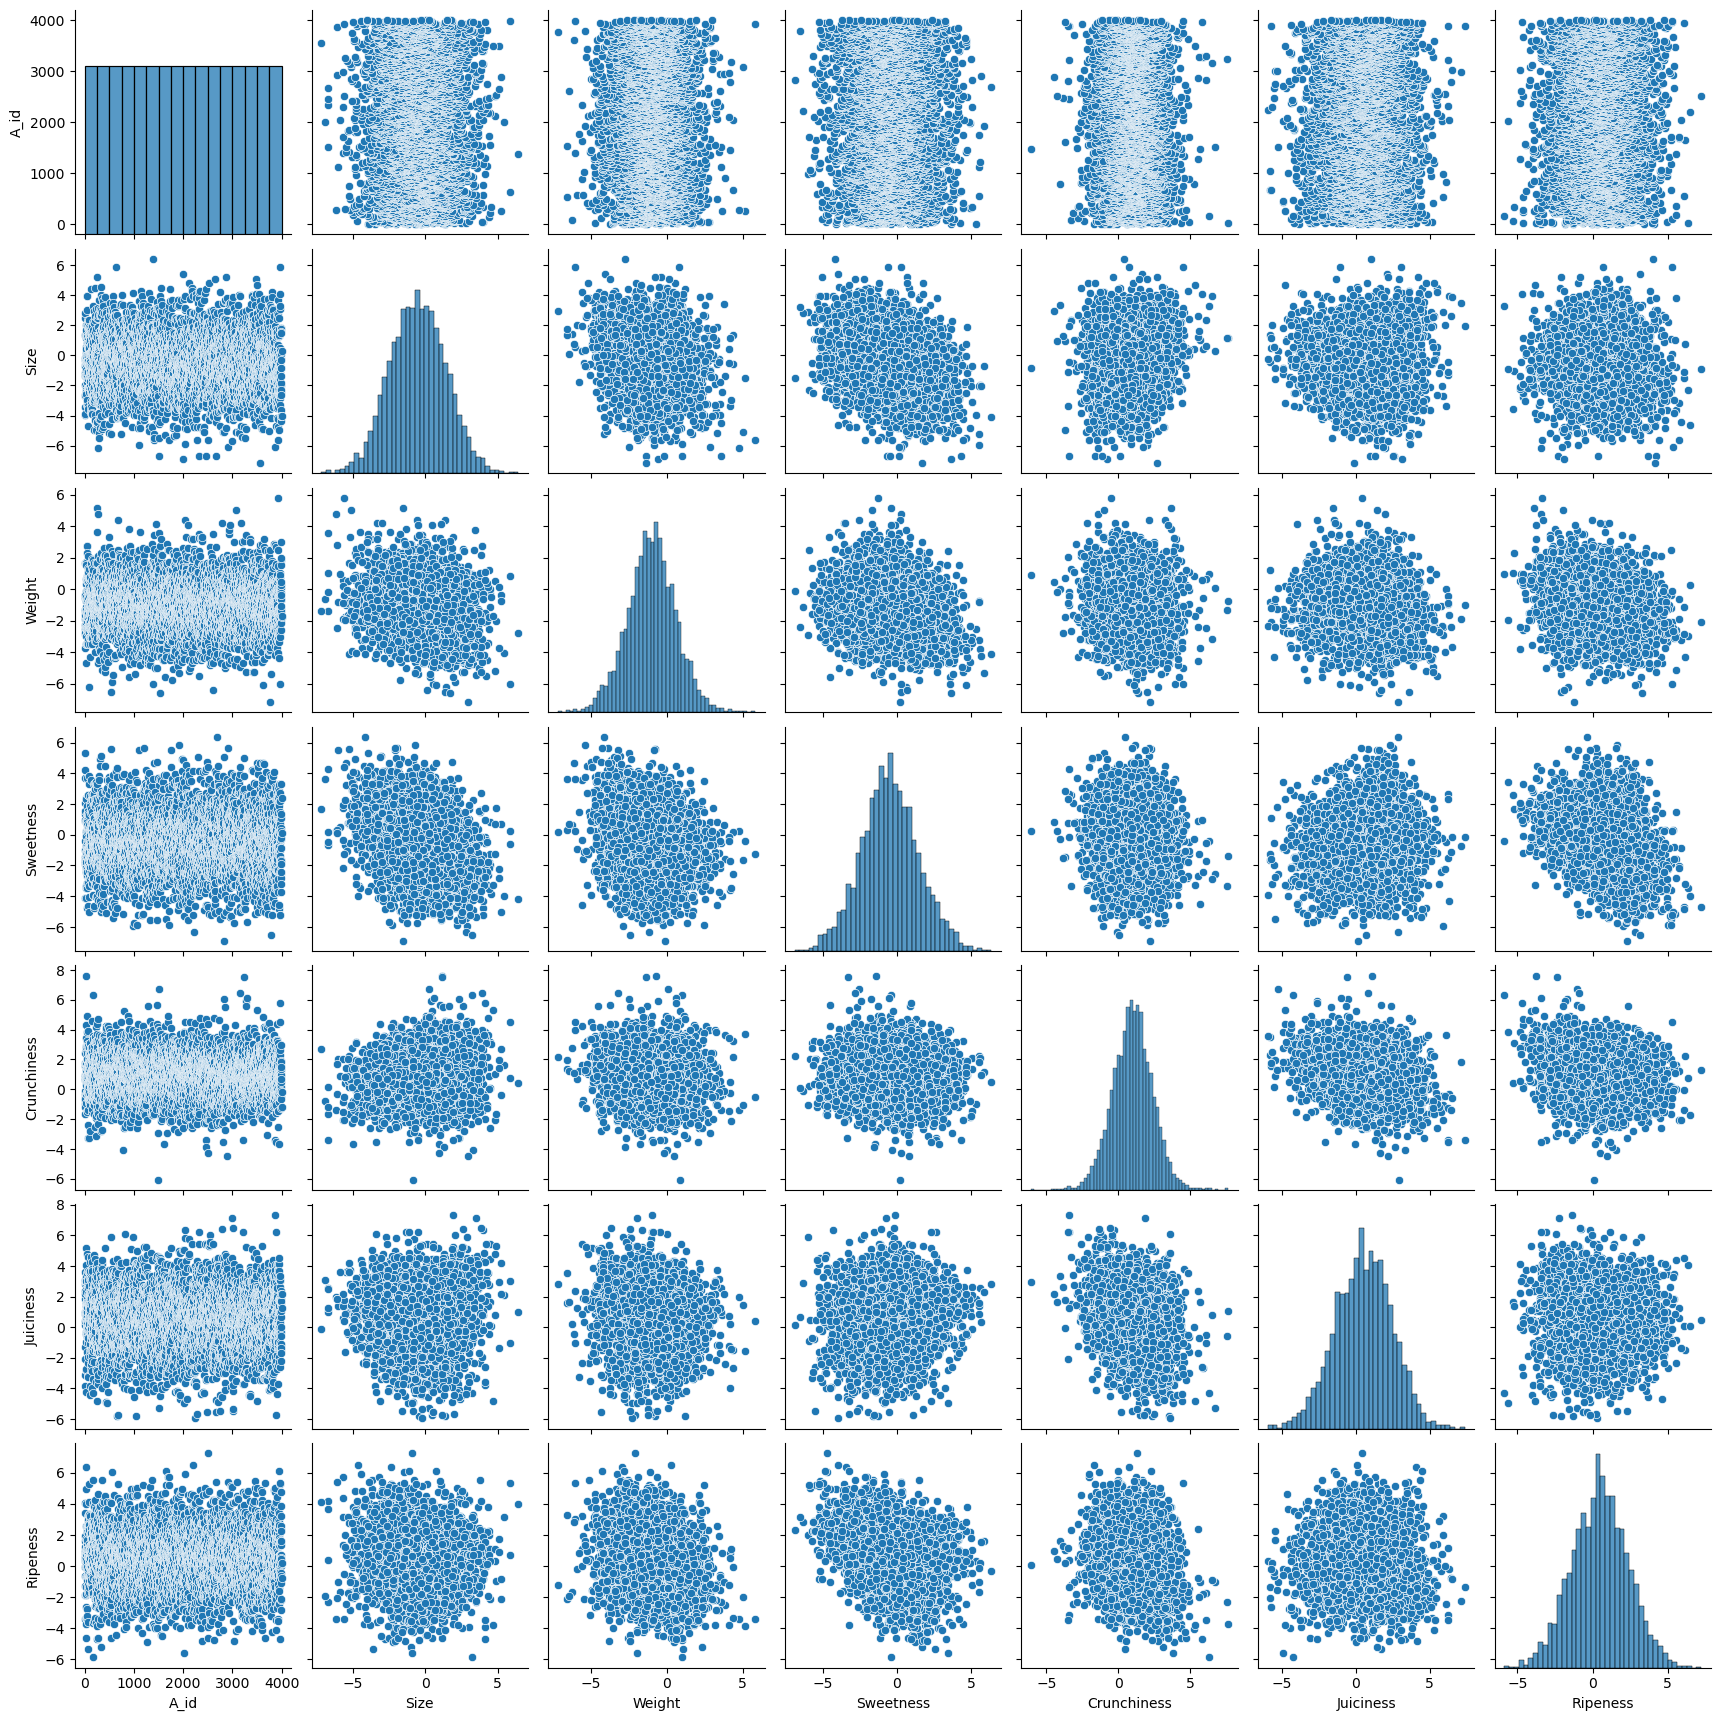

In [5]:
sns.pairplot(data)

<Axes: >

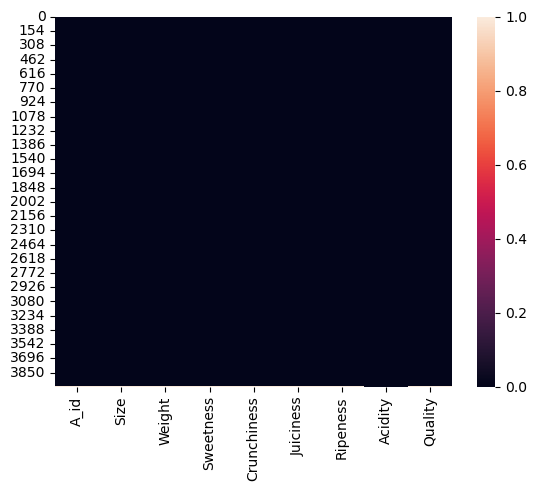

In [6]:
sns.heatmap(data.isna())

In [7]:
data.describe()

A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.874427  
min      -5.961897    -5.864599  
25%      -0.801286    -0.771677  
50%       0.534219     0.503445  
75%       1.835976     1.766212  
max       7.364403     7.237837

In [8]:
data.dropna(axis = 0, inplace = True)

In [9]:
data.shape

(4000, 9)

In [10]:
correlation = data.corr()
print(correlation)

                 A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  \
A_id         1.000000 -0.028911 -0.005730  -0.002378    -0.013111   0.006179   
Size        -0.028911  1.000000 -0.170702  -0.324680     0.169868  -0.018892   
Weight      -0.005730 -0.170702  1.000000  -0.154246    -0.095882  -0.092263   
Sweetness   -0.002378 -0.324680 -0.154246   1.000000    -0.037552   0.095882   
Crunchiness -0.013111  0.169868 -0.095882  -0.037552     1.000000  -0.259607   
Juiciness    0.006179 -0.018892 -0.092263   0.095882    -0.259607   1.000000   
Ripeness     0.000742 -0.134773 -0.243824  -0.273800    -0.201982  -0.097144   

             Ripeness  
A_id         0.000742  
Size        -0.134773  
Weight      -0.243824  
Sweetness   -0.273800  
Crunchiness -0.201982  
Juiciness   -0.097144  
Ripeness     1.000000  


C:\Users\konai\AppData\Local\Temp\ipykernel_12620\3497694653.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


## conclusion : 
Pas de correlation entre les données.
Aucune donnée manquante.
Suppression de la valeur inconnue

# Première partie : Classification de la douceur de la pomme 'Sweetness' en fonction de sa qualité 'Quality'

In [11]:
df = data.copy()
Quality = df['Quality']
Sweetness = df['Sweetness']

In [12]:
Quality.value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

In [13]:
Y_label = Quality.replace(['good', 'bad'],[1, 0])

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.metrics import f1_score

In [15]:
X_train, X_t, Y_train, Y_t = train_test_split(Sweetness, Y_label, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_t, Y_t, test_size=0.5, random_state=42)

In [16]:
X_train_reshaped = X_train.array.reshape(2400, 1)
Y_train_reshaped = Y_train.array.reshape(2400, 1)
X_val_reshaped = X_val.array.reshape(800, 1)
Y_val_reshaped = Y_val.array.reshape(800, 1)
X_test_reshaped = X_test.array.reshape(800, 1)


param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
    'penalty' : ['l2', 'l1'],
    'alpha' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001],
    'tol' : [1e-3, 2e-3, 1e-4, 3e-3],
    'epsilon' : [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'random_state' : [42]
}

model = GridSearchCV(SGDClassifier(), param_grid, cv = 5)
model.fit(X_train_reshaped, Y_train_reshaped)

C:\Users\konai\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\konai\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\konai\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\konai\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001],
                         'epsilon': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                     0.8],
                         'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'penalty': ['l2', 'l1'], 'random_state': [42],
                         'tol': [0.001, 0.002, 0.0001, 0.003]})

In [17]:
model.best_estimator_

SGDClassifier(alpha=0.0002, epsilon=0.4, loss='huber', random_state=42,
              tol=0.0001)

In [18]:
model.best_score_

0.6008333333333333

In [19]:
model.best_params_

{'alpha': 0.0002,
 'epsilon': 0.4,
 'loss': 'huber',
 'penalty': 'l2',
 'random_state': 42,
 'tol': 0.0001}

In [20]:
model_1 = SGDClassifier(loss = 'huber', alpha = 0.0002, epsilon=0.4, random_state=42, tol=0.0001)
model_1.fit(X_train_reshaped, Y_train_reshaped)
outcome = model_1.score(X_val_reshaped, Y_val_reshaped)
print('Accuracy = ', outcome)

Accuracy =  0.5975


C:\Users\konai\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


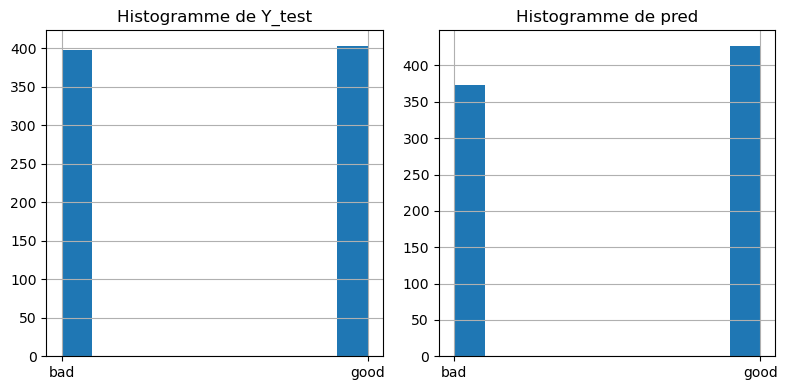

Prediction =
 1    427
0    373
dtype: int64 

Ground_truth = 
 1    403
0    397
Name: Quality, dtype: int64


In [21]:
prediction = model_1.predict(X_test_reshaped)
pred = pd.Series(prediction)

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1) # 1 ligne, 2 colonnes, 1er tracé
Y_test.hist()
plt.xticks([0.0, 1.0], ['bad', 'good']) # permet de modifier les labels
plt.title('Histogramme de Y_test')

plt.subplot(1, 2, 2) # 1 ligne, 2 colonnes, 2e tracé
pred.hist()
plt.xticks([0.0, 1.0], ['bad', 'good'])
plt.title('Histogramme de pred')

plt.tight_layout()  # Pour éviter que les sous-tracés se chevauchent
plt.show()

print('Prediction =\n', pred.value_counts(), '\n')
print('Ground_truth = \n', Y_test.value_counts())

In [22]:
Y_test_reshaped = Y_test.array.reshape(800,1)
error = f1_score(Y_test_reshaped, prediction)
print(error)

0.5975903614457831


In [23]:
model_2 = RidgeClassifier(alpha = 1.0, random_state = 42)
model_2.fit(X_train_reshaped, Y_train_reshaped)
output = model_2.score(X_val_reshaped, Y_val_reshaped)
print('Accuracy = ', output)

Y_pred = model_2.predict(X_test_reshaped)
Y_pred_series = pd.Series(Y_pred)
Y_pred_series.value_counts()

error_2 = f1_score(Y_test_reshaped,Y_pred)
print('Error = ',error_2)

Accuracy =  0.59375
Error =  0.5860349127182045


C:\Users\konai\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1178: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


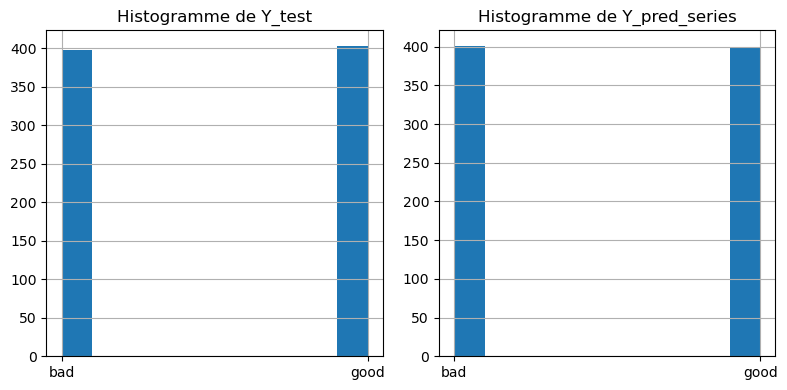

Prediction =
 0    401
1    399
dtype: int64 

Ground_truth = 
 1    403
0    397
Name: Quality, dtype: int64


In [24]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1) # 1 ligne, 2 colonnes, 1er tracé
Y_test.hist()
plt.xticks([0.0, 1.0], ['bad', 'good']) # permet de modifier les labels
plt.title('Histogramme de Y_test')

plt.subplot(1, 2, 2) # 1 ligne, 2 colonnes, 2e tracé
Y_pred_series.hist()
plt.xticks([0.0, 1.0], ['bad', 'good'])
plt.title('Histogramme de Y_pred_series')

plt.tight_layout()  # Pour éviter que les sous-tracés se chevauchent
plt.show()

print('Prediction =\n', Y_pred_series.value_counts(), '\n')
print('Ground_truth = \n', Y_test.value_counts())

In [25]:
X_s = np.array([-0.50, -0.49, -0.43, -0.51, 5, -1]).reshape(6,1)
Y = model_2.predict(X_s)
Y1 = model_1.predict(X_s)
print(Y,Y1)

[0 0 1 0 1 0] [1 1 1 1 1 0]


## Conclusion :

Le modèle 2 a une précision de 0.5937 et une erreur de 0.5860, tandis que le modèle 1 a précision et une erreur presque similaire 0.5975.

Pour des valeurs comprises entre -0.43 et +inf, le modèle 2 donne la qualité 'good' aux pommes, tandis que le seuil du modèle 1 pour que la qualité soit bonne est de -0.56

Le modèle 2 est plus précis que le modèle 1

# Deuxième partie : Relation entre la teneur en jus 'Juiciness' et le degré de maturité 'Ripeness' d'une pomme

In [26]:
Juiciness = df['Juiciness']
Ripeness = df['Ripeness']

In [27]:
Juiciness_reshaped = Juiciness.array.reshape(4000,1)
Ripeness_reshaped = Ripeness.array.reshape(4000,1)

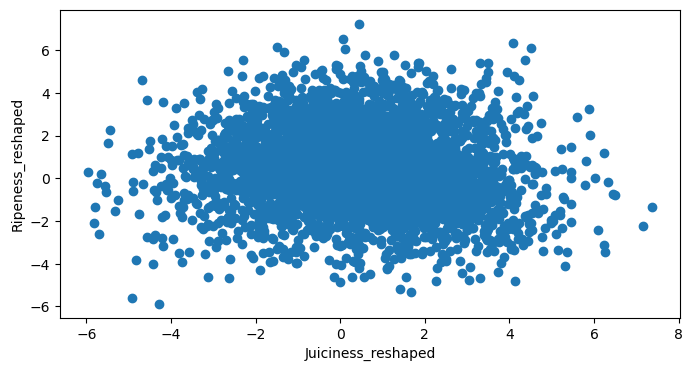

In [28]:
plt.figure(figsize = (8,4))
plt.xlabel('Juiciness_reshaped')
plt.ylabel('Ripeness_reshaped')
plt.scatter(Juiciness_reshaped, Ripeness_reshaped)
plt.show()

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from  sklearn.preprocessing import StandardScaler

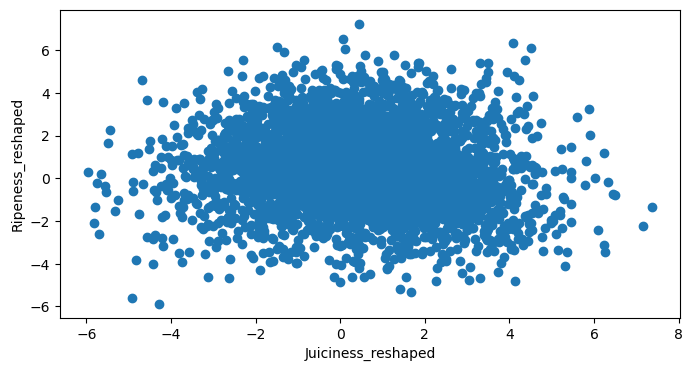

In [30]:
# Regrouper les caractéristiques dans une seule variable
X = np.stack([Juiciness_reshaped, Ripeness_reshaped], axis = 1).reshape(4000,2)

# Vérification
plt.figure(figsize = (8,4))
plt.xlabel('Juiciness_reshaped')
plt.ylabel('Ripeness_reshaped')
plt.scatter(X[:,0],X[:,1])
plt.show()

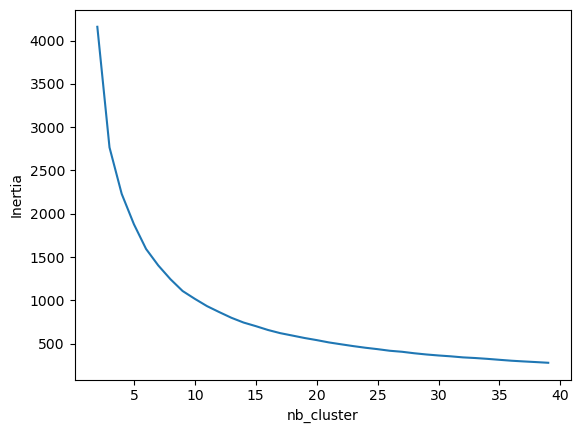

In [31]:
y = np.array([i for i in range(4000)]).reshape(4000,1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données pour que toutes les variables aient la même échelle
scaler = StandardScaler()
scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)



# Détermination du cluster optimal
Inertia = []
nb_cluster = np.arange(2,40)
for i in range(2,40):
    model_3 = KMeans(n_clusters = i, random_state = 0)
    model_3.fit(x_train_norm)
    Inertia.append(model_3.inertia_)
    
plt.plot(nb_cluster, Inertia)
plt.xlabel('nb_cluster')
plt.ylabel('Inertia')
plt.show()


# La méthode score() dans scikit-learn pour les modèles KMeans ne renvoie pas la performance du modèle 
# comme dans le cas du modèle supervisé. Au lieu de cela, elle renvoie la somme des carrés des 
# distances des échantillons à leur centre de cluster le plus proche. Cette valeur est utilisée pour évaluer 
# l'ajustement du modèle, mais elle ne peut pas être interprétée de la même manière qu'une mesure 
# de performance dans un modèle supervisé.

In [32]:
model_3 = KMeans(n_clusters = 10, random_state = 0)
model_3.fit(x_train_norm)

score = model_3.score(x_train_norm)  
inertia = model_3.inertia_
print(score, "||", inertia)

# La méthode score mesure la distance entre les points d'un cluster et le centre de ce dernier.

-1017.4678499285438 || 1017.4678499285438


In [33]:
x_train_pred = model_3.predict(x_train_norm)
x_test_pred = model_3.predict(x_test_norm)

silhouette_avg_train = silhouette_score(x_train_norm, x_train_pred)
silhouette_avg_test = silhouette_score(x_test_norm, x_test_pred)

print('score silhouette train = ', silhouette_avg_train)
print('score silhouette test = ',silhouette_avg_test)

# Le score de silhouette reste stable. Les échantillons sont à peu près bien assignés à des clusters.
# Cependant, il y a des chevauchements entre certains clusters

score silhouette train =  0.3239622325835471
score silhouette test =  0.2935390224722496


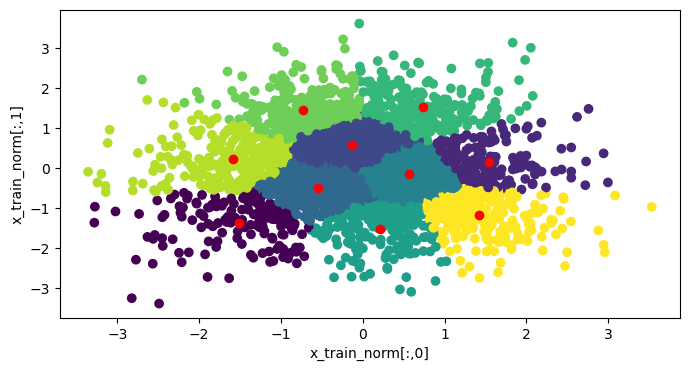

In [34]:
plt.figure(figsize = (8,4))
plt.scatter(x_train_norm[:,0] , x_train_norm[:,1], c = model_3.predict(x_train_norm))
plt.scatter(model_3.cluster_centers_[:,0],model_3.cluster_centers_[:,1], c = 'r')
plt.xlabel('x_train_norm[:,0]')
plt.ylabel('x_train_norm[:,1]')
plt.show()

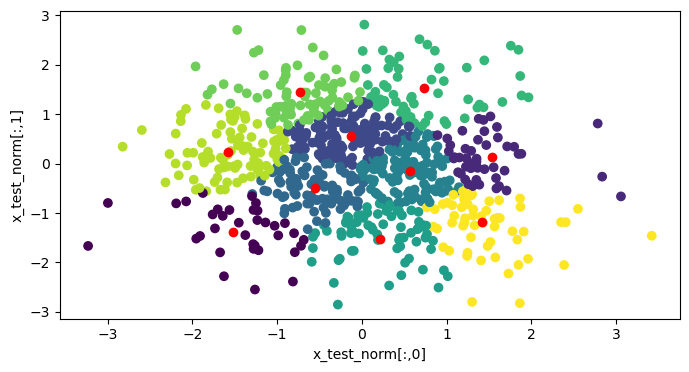

In [35]:
plt.figure(figsize = (8,4))
plt.scatter(x_test_norm[:,0] , x_test_norm[:,1], c = model_3.predict(x_test_norm))
plt.scatter(model_3.cluster_centers_[:,0],model_3.cluster_centers_[:,1], c = 'r')
plt.xlabel('x_test_norm[:,0]')
plt.ylabel('x_test_norm[:,1]')
plt.show()

## Conclusion



Ce modèle traduit bien la relation entre la teneur en jus et la maturité du fruit. Avec de nouvelles données, il est   capable de bien assigner des échantillons à des clusters avec un précision de 0,29. Néanmoins, certains clusters se chevauchent.